In [1]:
import numpy as np
import abc
from scipy.interpolate import interp2d, interp1d
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import cm, ticker, colors
from IPython.core.pylabtools import figsize

from spectrum import DMSpectrum, FireProfile, NFWProfile

### The spectrum  

You need to provide the data table from PPPC4

In [2]:
# the dictionary object for DM annihilation channle and the column numbers in the table.
ew_dict = {"e": 4, "mu": 7, "tau": 10, "bb": 13, "tt": 14, "WW": 17, "ZZ": 20, "gamma": 22, "h": 23}
noew_dict = {"e": 2, "mu": 3, "tau": 4, "bb": 7, "tt": 8, "WW": 9, "ZZ": 10, "gamma": 12, "h": 13}
# path to the data folder
data_folder = "/home/jguo/workspace/data/pppc4spectrum"
# the final state particle.
particle = "gammas"
# use electroweak correction or not.
ewcorr = True

In [3]:
spect = DMSpectrum(data_folder, ewcorr, particle, ew_dict)
channel = "ZZ"
mdm = 2000  # [GeV]
log10_e_vec = np.linspace(-5, np.log10(mdm), 100)  # [GeV]
e_vec = np.power(10., log10_e_vec) #
dnde_value = spect.get_dnde_val(mdm, channel, e_vec)

####  The plot of spectrum

/tmp/ipykernel_2882/2697579745.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=15,  handlelength=1, loc='upper right', labelspacing=.3, ncol=1, columnspacing=0.5, frameon=False)


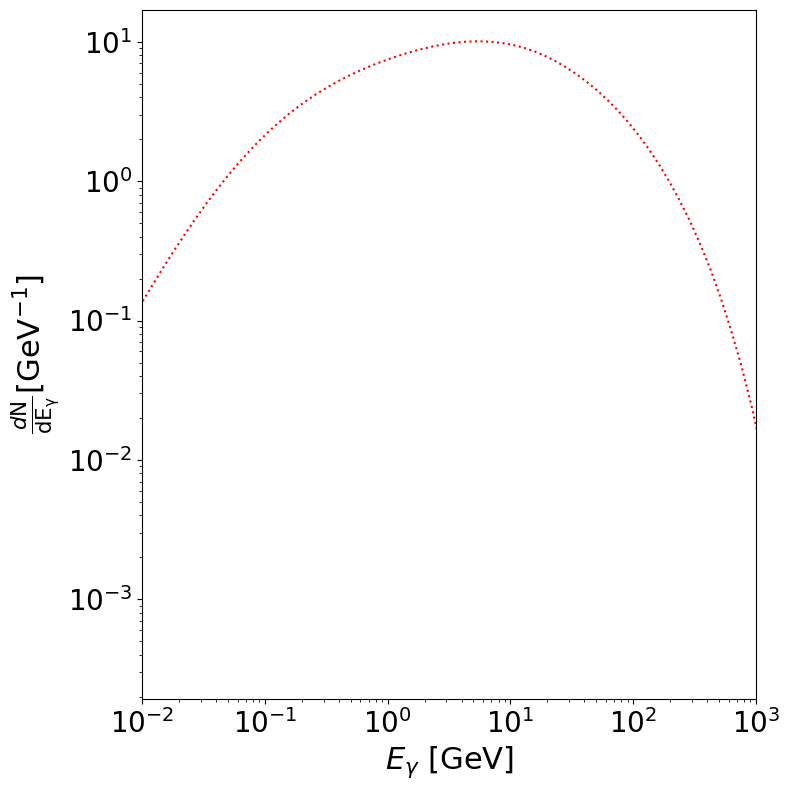

In [4]:
plt.figure(figsize(8, 8))

plt.xscale("log")

plt.yscale("log")
# plt.ylim([1e-45, 1e-35])
plt.xlim([0.01, 1e3])

# plt.plot(e_vec, dnde_value, label=r"class", c="r", linestyle="dotted")
plt.plot(e_vec, dnde_value, c="r", linestyle="dotted")

plt.legend(fontsize=15,  handlelength=1, loc='upper right', labelspacing=.3, ncol=1, columnspacing=0.5, frameon=False)

plt.xlabel(r"$E_{\gamma}$ [GeV]", fontsize=22)
plt.ylabel(r"$\frac{d\rm{N}}{d\rm{E_{\gamma}}}$[$\rm{GeV^{-1}}$]", fontsize=22)

plt.tick_params(labelsize=20)
plt.tight_layout()

### The DM profile

In [5]:
gamma = 1.
rs = 24.42 # 15 # 24.42
rhos = 0.184

nfw = NFWProfile(gamma, rs, rhos)

i = 4
theta_1 = np.pi/30 * (i - 1)
theta_2 = np.pi/30 * i

npoint = 1000
nfw.get_jfactor_theta(theta_1, theta_2, npoint)

set rhos = 0.23646953648535704


1.147397180621869e+22

set rhos = 0.23646953648535704


(0.05, 100.0)

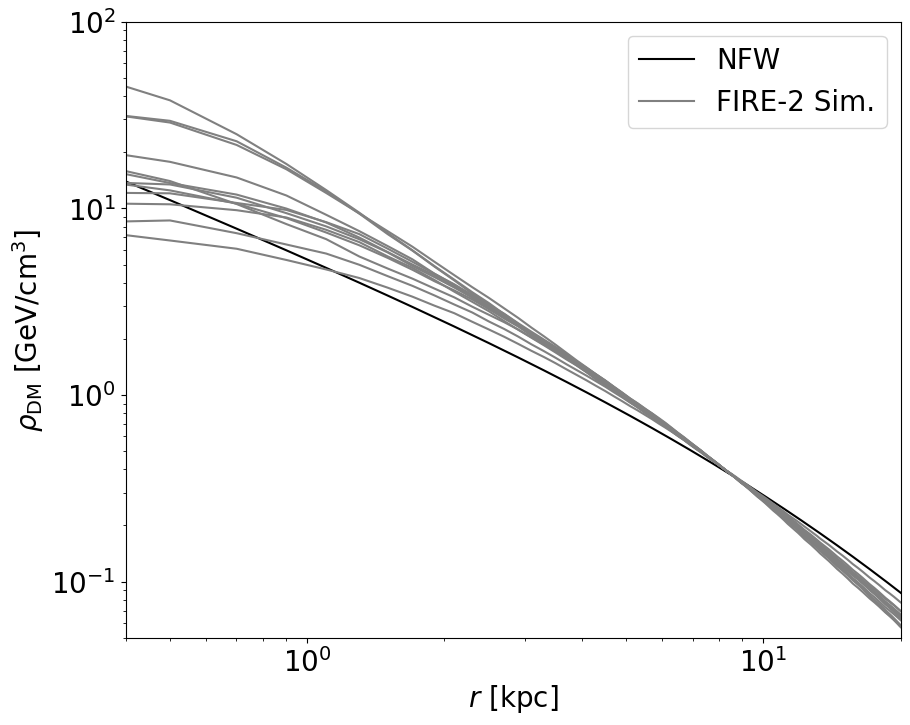

In [6]:
rs_array = np.linspace(0.1,100,500)
rho_NFW_array = nfw.rho_dm(rs_array)
path = "./Profiles"


fig = plt.figure(figsize=(10,8))
plt.plot(rs_array,rho_NFW_array,'k-',label="NFW")
# plt.plot(rs_array,rho_Ein_array,'k--',label="Einasto")
# plt.plot(rs_array,rho_Burk_array,'k-.',label="Burkert")

for i in range(12):
  fire = FireProfile(path, i)
  rho_fire_array = fire.rho_dm(rs_array)
  if i ==0:
    plt.plot(rs_array, rho_fire_array, color="grey", label="FIRE-2 Sim.")
  else:
    plt.plot(rs_array, rho_fire_array, color="grey")


plt.yscale('log')
plt.xscale('log')

plt.xlabel(r"$r$ [kpc]",fontsize=20)
plt.ylabel(r"$\rho_{\rm DM}$ [GeV/cm$^3$]",fontsize=20)

plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(0.4,20)
plt.ylim(5e-2,1e2)